# Configuration

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as st
from scipy.stats import t, shapiro
import random
from scipy.stats import ks_2samp
!pip install pmdarima
from pmdarima import auto_arima
from scipy.stats import shapiro

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.metrics import mean_squared_error


     |████████████████████████████████| 1.5MB 6.6MB/s 
     |████████████████████████████████| 9.5MB 33.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
pip install -q -U keras-tuner

     |████████████████████████████████| 71kB 5.1MB/s 


In [3]:
import kerastuner as kt

In [4]:
from kerastuner.tuners import RandomSearch

In [5]:
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
plt.style.use('fivethirtyeight')

# IMPORTATION DONNEES

## Consomation

In [7]:
# importation des données consommation
data = pd.read_csv("/content/drive/My Drive/DATASETS/eCO2mix_RTE_energie_M.xls.csv")
data.head()

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,977,356,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,1572,329,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,974,454,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Mois                                      1286 non-null   object 
 1   Qualité                                   1286 non-null   object 
 2   Territoire                                1286 non-null   object 
 3   Production totale                         1286 non-null   int64  
 4   Production nucléaire                      796 non-null    float64
 5   Production thermique totale               1286 non-null   int64  
 6   Production thermique charbon              857 non-null    float64
 7   Production thermique fioul                1286 non-null   int64  
 8   Production thermique gaz                  1286 non-null   int64  
 9   Production hydraulique                    1286 non-null   int64  
 10  Production éolien                   

In [9]:
data.shape

(1286, 22)

In [10]:
# suppression données inutiles
data = data.loc[data["Mois"] != "0000-00",]
data = data.loc[data["Territoire"] == "France",]

In [11]:
data.shape

(110, 22)

In [12]:
data.head()

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,Production éolien,Production solaire,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,1587,125,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,1123,216,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,977,356,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,1572,329,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,974,454,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


In [13]:
# suppression données initules
data = data[["Mois","Consommation totale"]]


In [14]:
# Exploration plage date
data.iloc[-1,]

Mois                   2021-02
Consommation totale      42914
Name: 1279, dtype: object

* Données consomation de janvier 2012 à mai 2020

In [15]:
# sauvegarde
data_conso_full = data

## DJU

In [16]:
# importation données dju
dju = pd.read_csv("/content/drive/My Drive/DATASETS/calcul_DJU_06_07_2020.csv",decimal=",")
dju.head(10)

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
0,2019,428.6,296.4,266.0,203.4,150.4,21.6,0.0,0.0,0.0,0.0,0.0,0.0,1366.4
1,2018,322.3,456.9,332.4,154.8,97.2,30.0,4.3,25.3,76.6,149.4,298.6,349.7,2297.3
2,2017,498.8,301.0,236.4,231.8,102.7,30.7,21.0,31.5,94.6,136.4,311.1,394.2,2390.0
3,2016,389.3,347.5,346.3,249.4,129.4,52.8,28.4,25.8,44.5,205.4,310.6,426.0,2555.3
4,2015,422.7,392.8,307.6,190.9,132.2,51.3,25.7,24.2,106.9,208.0,218.0,269.3,2349.7
5,2014,344.5,295.6,271.9,171.0,134.5,51.7,26.6,53.5,54.8,121.5,242.7,397.6,2165.9
6,2013,453.5,427.5,400.5,243.9,185.3,69.1,14.7,40.5,74.4,128.9,323.9,381.8,2743.9
7,2012,365.4,466.9,247.1,257.4,109.4,64.0,44.2,25.7,101.9,169.9,317.8,370.3,2540.1


In [17]:
dju.drop("Total", axis = 1 , inplace = True)

In [18]:
dju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8 non-null      int64  
 1   JAN         8 non-null      float64
 2   FÉV         8 non-null      float64
 3   MAR         8 non-null      float64
 4   AVR         8 non-null      float64
 5   MAI         8 non-null      float64
 6   JUN         8 non-null      float64
 7   JUI         8 non-null      float64
 8   AOÛ         8 non-null      float64
 9   SEP         8 non-null      float64
 10  OCT         8 non-null      float64
 11  NOV         8 non-null      float64
 12  DÉC         8 non-null      float64
dtypes: float64(12), int64(1)
memory usage: 960.0 bytes


In [19]:
# renommage colonnes
dju.columns = ['annee', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

# Changement format large vers long
dju = pd.melt(dju, id_vars='annee', var_name='mois', value_name='dju')

# Création date en format correct, et on convertion en datetime
dju['date'] = dju['annee'].astype(str) + '-' + dju['mois']


In [20]:
dju.head(5)

,annee,mois,dju,date
0,2019,01,428.6,2019-01
1,2018,01,322.3,2018-01
2,2017,01,498.8,2017-01
3,2016,01,389.3,2016-01
4,2015,01,422.7,2015-01


In [21]:
dju.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   annee   96 non-null     int64  
 1   mois    96 non-null     object 
 2   dju     96 non-null     float64
 3   date    96 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.1+ KB


In [22]:
# Suppression mois avec données nulles
dju = dju.loc[dju['dju'] != 0]
dju = dju[["dju","date"]]
dju.head(5)

,dju,date
0,428.6,2019-01
1,322.3,2018-01
2,498.8,2017-01
3,389.3,2016-01
4,422.7,2015-01


In [23]:
# merge données consommation et dju
data = pd.merge(data, dju, left_on="Mois", right_on="date")

In [24]:
# conservation données utiles
data = data[["date","Consommation totale","dju"]]

data.head(5)

,date,Consommation totale,dju
0,2012-01,51086,365.4
1,2012-02,54476,466.9
2,2012-03,43156,247.1
3,2012-04,40176,257.4
4,2012-05,35257,109.4


In [25]:
# Changement type série temporelle
data.date = pd.to_datetime(data.date)
# Passage date en index
data.set_index("date", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2012-01-01 to 2019-06-01
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Consommation totale  90 non-null     int64  
 1   dju                  90 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 2.1 KB


In [26]:
data.head(5)

,Consommation totale,dju
date,,
2012-01-01,51086,365.4
2012-02-01,54476,466.9
2012-03-01,43156,247.1
2012-04-01,40176,257.4
2012-05-01,35257,109.4


# DESCRIPTIF

In [27]:
data.shape

(90, 2)

* 90 mois

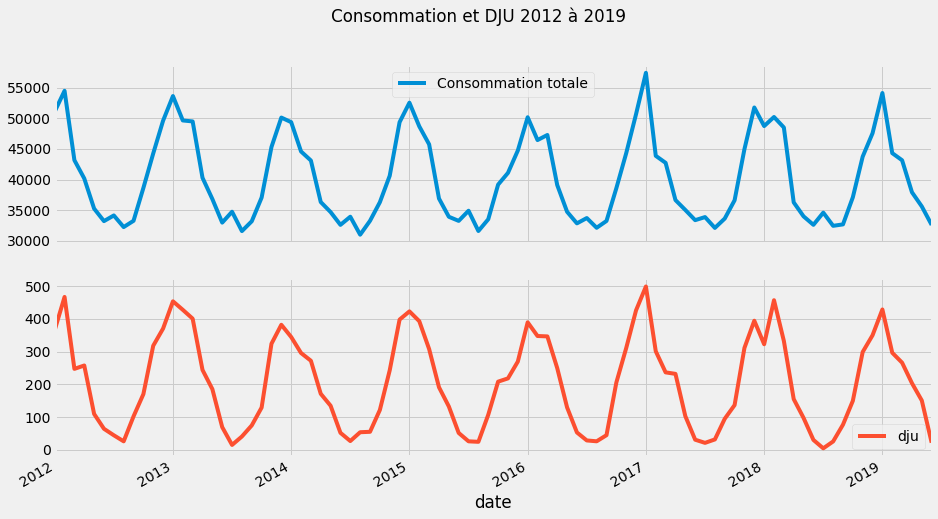

In [28]:
# graphique données complètes
data.plot(figsize = (14,8), subplots=True)
plt.suptitle("Consommation et DJU 2012 à 2019")
plt.show()

* Additif

In [29]:
# tendances centrales
data.describe()

,Consommation totale,dju
count,90.000000,90.000000
mean,40188.066667,204.544444
std,7134.325432,142.359230
min,31004.000000,4.300000
25%,33757.750000,65.275000
50%,37514.500000,197.150000
75%,45631.750000,321.175000
max,57406.000000,498.800000


In [30]:
# CV Consommation
np.std(data["Consommation totale"]) / np.mean(data["Consommation totale"]) 

0.1765344831283046

In [31]:
# CV dju
np.std(data["dju"]) / np.mean(data["dju"]) 

0.6921045280246256

## Corrélation

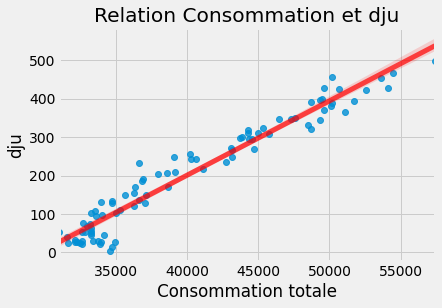

In [32]:
# graphique conso et dju pour recherche corrélation
sns.regplot(x=data["Consommation totale"], y=data["dju"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Relation Consommation et dju")
plt.show()


In [33]:
# calcul corrélation
data.corr()

,Consommation totale,dju
Consommation totale,1.000000,0.970507
dju,0.970507,1.000000


# Correction effet température


In [34]:
# définition features et target
Y = data["Consommation totale"]
X = data["dju"]

# ajout constante
X = sm.add_constant(X) #  constant

# Entrainement modele
model = sm.OLS(Y, X).fit()

print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     Consommation totale   R-squared:                       0.942
Model:                             OLS   Adj. R-squared:                  0.941
Method:                  Least Squares   F-statistic:                     1426.
Date:                 Mon, 07 Jun 2021   Prob (F-statistic):           3.72e-56
Time:                         10:27:39   Log-Likelihood:                -797.70
No. Observations:                   90   AIC:                             1599.
Df Residuals:                       88   BIC:                             1604.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.024e+04    320.368     94.39

### Atypicité des observations

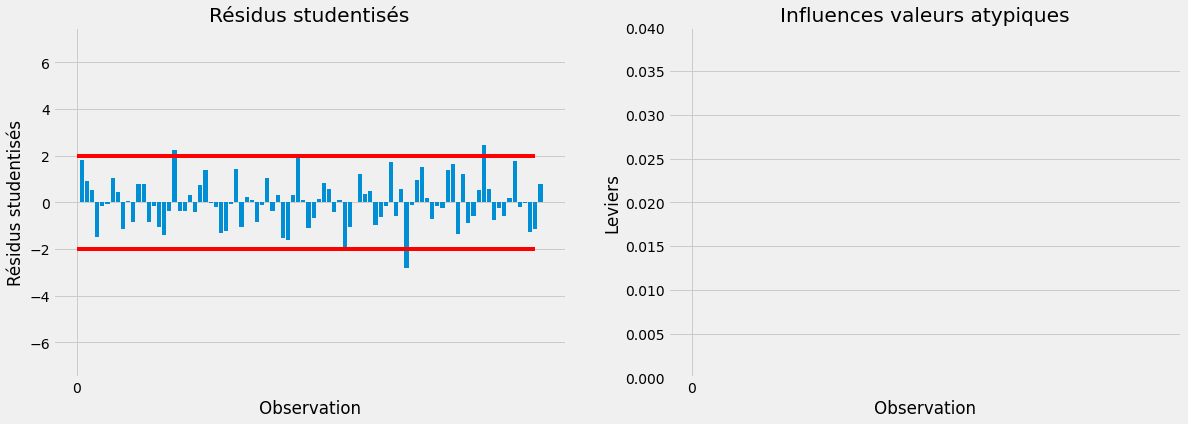

In [35]:
# Sélection du seuil
alpha = 0.05

# nb observation
n = data.shape[0]

# nb variables
p = 1

#création df analyse
analyses = pd.DataFrame({'obs':np.arange(1, n+1)})

# Calcul levier, résidus studentisés et Cook
analyses['levier'] = model.get_influence().hat_matrix_diag
analyses['rstudent'] = model.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2,n-p-1)
influence = model.get_influence().summary_frame()
analyses['dcooks'] = influence['cooks_d']

# Calcul des seuils
seuil_levier = 2*p/n
seuil_dcook = 4/(n-p)
#Sélection observations atypiques
atypiques = analyses.loc[(analyses['rstudent'] > seuil_rstudent) | (analyses['rstudent'] < -seuil_rstudent), :]

# graphiques Résidus et distance cooks
fig = plt.figure(figsize=(18,6))
plt.subplot(121)
plt.bar(analyses['obs'], analyses['rstudent'])
plt.xticks(np.arange(0, n-1, step=500))
plt.xlabel('Observation')
plt.ylabel('Résidus studentisés')
plt.plot([0, n-1], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, n-1], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.ylim(-7.5, 7.5)
plt.title('Résidus studentisés')
plt.subplot(122)
plt.bar(atypiques['obs'], atypiques['dcooks'])
plt.xticks(np.arange(0, n-1, step=500))
plt.xlabel('Observation')
plt.ylabel('Leviers')
plt.plot([0, n-1], [seuil_dcook, seuil_dcook], color='r')
plt.ylim(0, 0.04)
plt.title('Influences valeurs atypiques')
plt.show()

* Aucune valeurs atypiques et influentes


### Variances résidus


Text(0.5, 1.0, 'Variance des résidus')

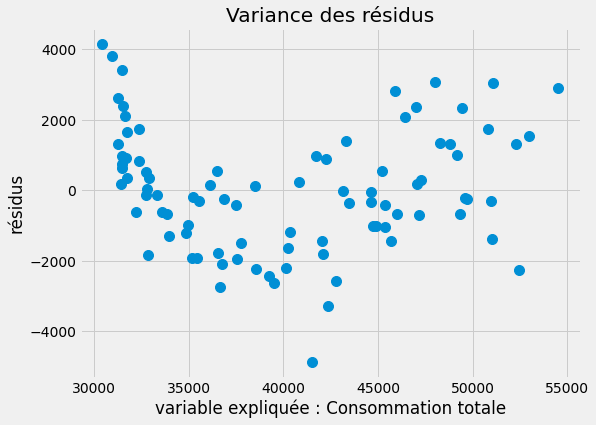

In [36]:
# graphique résidus
fig = plt.figure(figsize=(8,6))
plt.plot(model.fittedvalues, model.resid, '.',markersize=20)
plt.xlabel('variable expliquée : Consommation totale')
_ = plt.ylabel('résidus')
plt.title('Variance des résidus')

### Normalité des résidus

#### Distribution des résidus

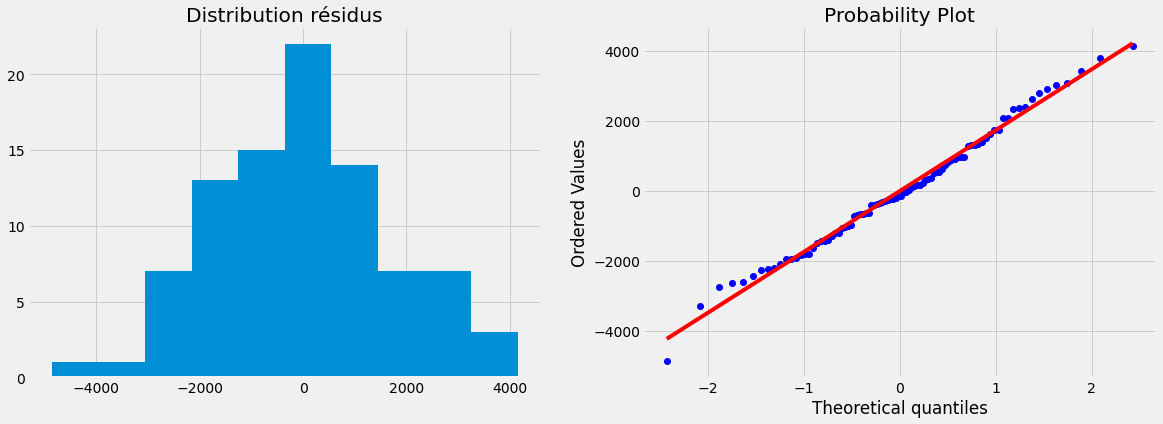

In [37]:
# graphiques normalité résidus
fig = plt.figure(figsize=(18,6))
plt.subplot(121)
plt.hist(model.resid)
plt.title('Distribution résidus')
plt.subplot(122)
st.probplot(model.resid, plot=plt)
plt.show()

#### Adhésion loi normale des résidus
H0 : distribution selon loi normale

In [38]:
#Kolmogorov-Smirnov
print("mod.resid")
print(ks_2samp(model.resid,list(np.random.normal(np.mean(model.resid), np.std(model.resid), 1000))))


mod.resid
Ks_2sampResult(statistic=0.06333333333333334, pvalue=0.8727121490328822)


* Adhésion loi normale des résidus

## Correction

In [39]:
print(model.params['dju'])

48.63689411922999


In [40]:
# correction conso de l'effet température
data['consommation_corrigee'] = data["Consommation totale"] - data['dju'] * model.params['dju']
data.head(5)

,Consommation totale,dju,consommation_corrigee
date,,,
2012-01-01,51086,365.4,33314.078889
2012-02-01,54476,466.9,31767.434136
2012-03-01,43156,247.1,31137.823463
2012-04-01,40176,257.4,27656.863454
2012-05-01,35257,109.4,29936.123783


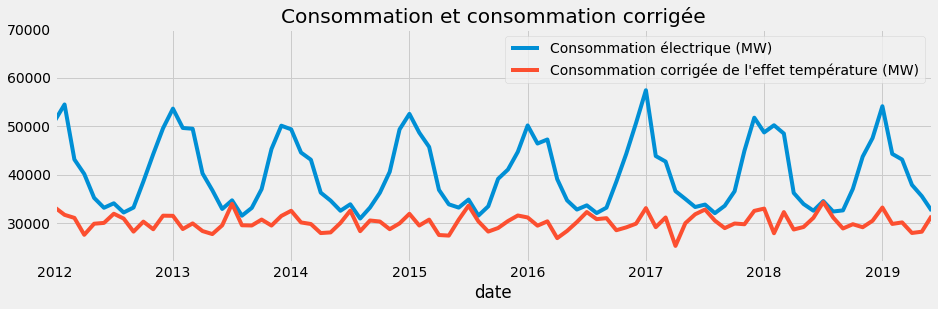

In [41]:
# graphique conso et conso corrigée température
data.plot(y = ['Consommation totale', 'consommation_corrigee'], 
          label=["Consommation électrique (MW)", "Consommation corrigée de l'effet température (MW)"],
          figsize=(14,4))
plt.title("Consommation et consommation corrigée")
plt.ylim((22000,70000))
plt.show()

# Désaisonnalité

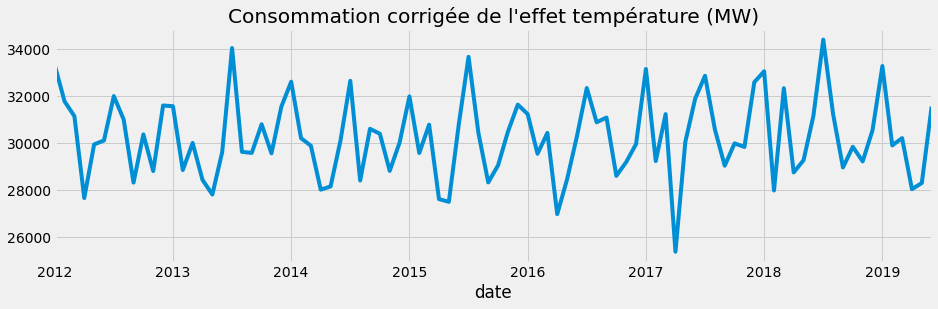

In [42]:
# graphyque donnée conso corrigée
data['consommation_corrigee'].plot(figsize=(14,4))
plt.title("Consommation corrigée de l'effet température (MW)")
plt.show()

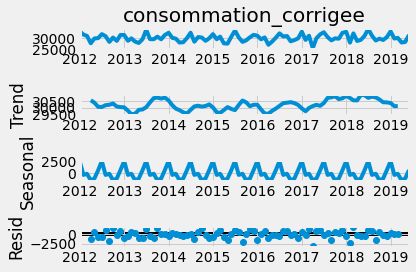

In [43]:
# décomposition sur 6 mois
decomp_x = sm.tsa.seasonal_decompose(data['consommation_corrigee'],  model='additive', period=6)
decomp_x.plot()
plt.show()

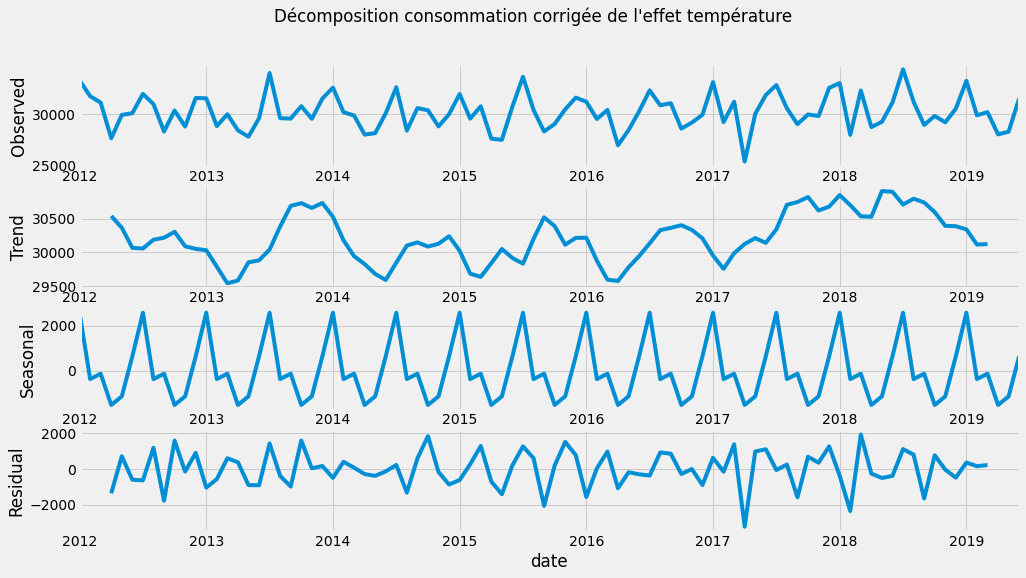

In [44]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))
data['consommation_corrigee'].plot(ax=ax1)
decomp_x.trend.plot(ax=ax2)
decomp_x.seasonal.plot(ax=ax3)
decomp_x.resid.plot(ax=ax4)

ax1.set_ylabel("Observed")
ax2.set_ylabel("Trend")
ax3.set_ylabel("Seasonal")
ax4.set_ylabel("Residual")
plt.suptitle("Décomposition consommation corrigée de l'effet température")
plt.show()

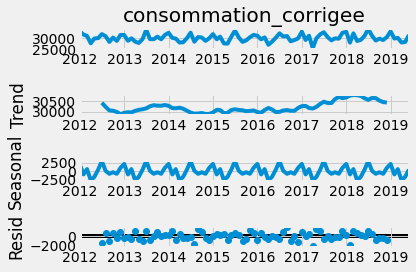

In [45]:
# décomposition sur 12 mois
decomp_x = sm.tsa.seasonal_decompose(data['consommation_corrigee'],  model='additive', period=12)
decomp_x.plot()
plt.show()

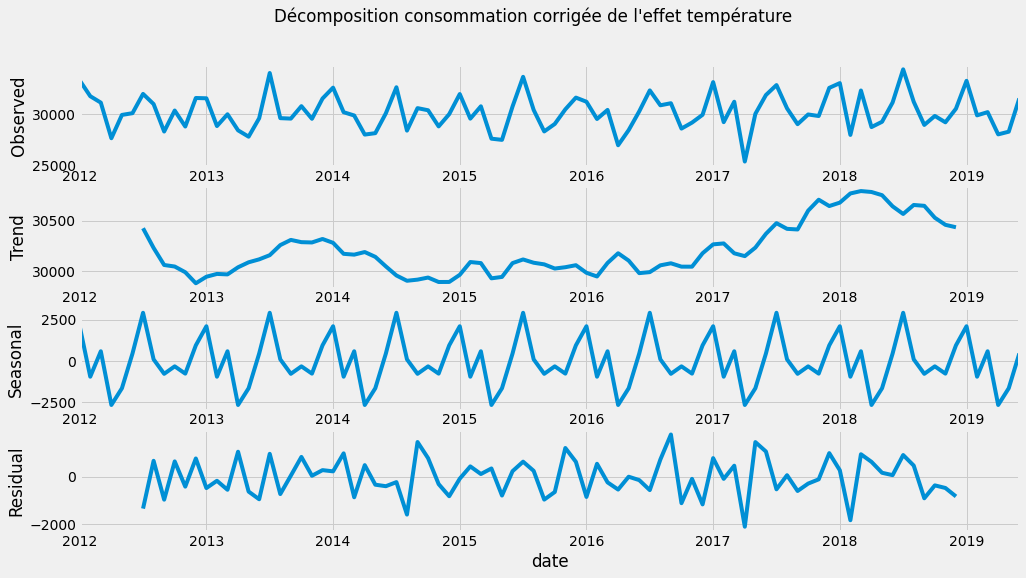

In [46]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,8))
data['consommation_corrigee'].plot(ax=ax1)
decomp_x.trend.plot(ax=ax2)
decomp_x.seasonal.plot(ax=ax3)
decomp_x.resid.plot(ax=ax4)

ax1.set_ylabel("Observed")
ax2.set_ylabel("Trend")
ax3.set_ylabel("Seasonal")
ax4.set_ylabel("Residual")
plt.suptitle("Décomposition consommation corrigée de l'effet température")
plt.show()

* Tendance ascendante
* Saisonalité
* stationaire ?

### Ad fuller test
HO = non stationnarité

In [47]:
results = adfuller(data['consommation_corrigee'])

In [48]:
print(results[1])

0.34338909420346153


* P > 05 -> non stationnarisé


### Saisonnalité


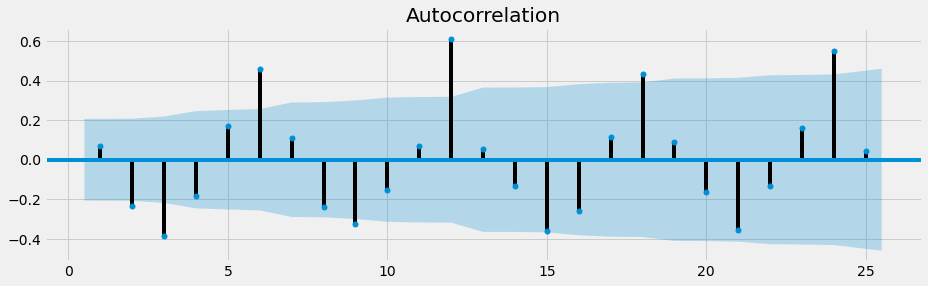

In [49]:
# ACF données corrigées
fig, ax = plt.subplots(1,1,figsize=(14,4))
plot_acf(data['consommation_corrigee'], ax = ax, lags=25, zero=False)
plt.show()

* Saisonnalité de 6 mois


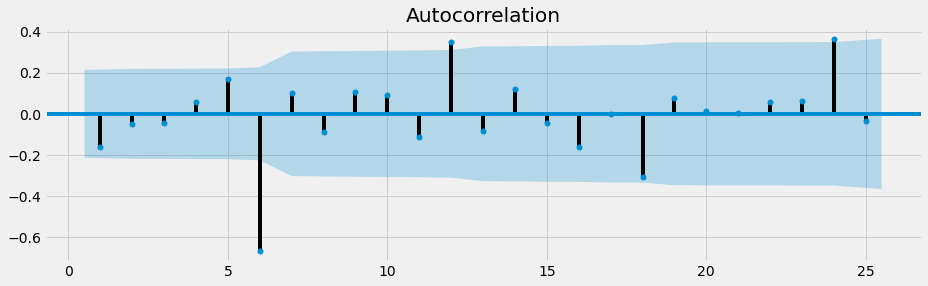

In [50]:
data_stationary = data['consommation_corrigee'].diff(6).dropna()

fig, ax = plt.subplots(1,1,figsize=(14,4))
plot_acf(data_stationary, ax = ax, lags=25, zero=False)
plt.show()

### Ad fuller test
HO = non stationnarité

In [51]:
results = adfuller(data_stationary)

In [52]:
print(results[1])

0.014587973432571778


* p < 0.5, rejet de H0 = Stationnaire

# Correction saisonnalité


In [53]:
# correction sur période 6 mois
decomp_x = sm.tsa.seasonal_decompose(data['consommation_corrigee'],  model='additive', period=6)

data["consommation_stationnaire"] = data['consommation_corrigee'] - decomp_x.seasonal
data.head(5)

,Consommation totale,dju,consommation_corrigee,consommation_stationnaire
date,,,,
2012-01-01,51086,365.4,33314.078889,30747.833346
2012-02-01,54476,466.9,31767.434136,32148.259178
2012-03-01,43156,247.1,31137.823463,31278.827049
2012-04-01,40176,257.4,27656.863454,29187.797489
2012-05-01,35257,109.4,29936.123783,31083.321218


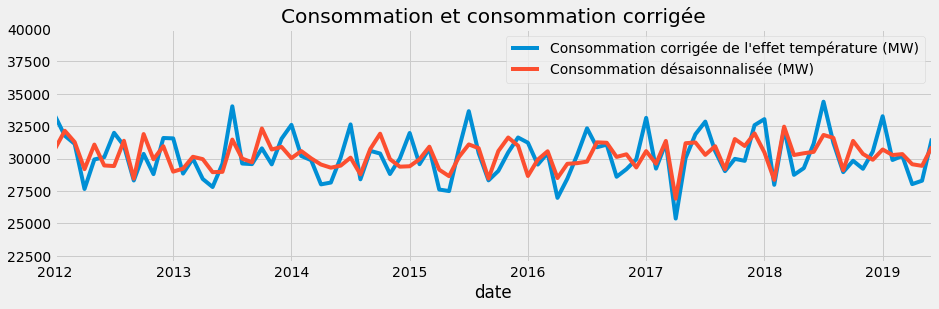

In [54]:
# graphique conso corrigée et désaisonnalisée
data.plot(y = ['consommation_corrigee','consommation_stationnaire'], 
          label=["Consommation corrigée de l'effet température (MW)",
                 "Consommation désaisonnalisée (MW)"],
          figsize=(14,4))
plt.title("Consommation et consommation corrigée")
plt.ylim((22000,40000))
plt.legend()
plt.show()

## Vérification saisonnalité

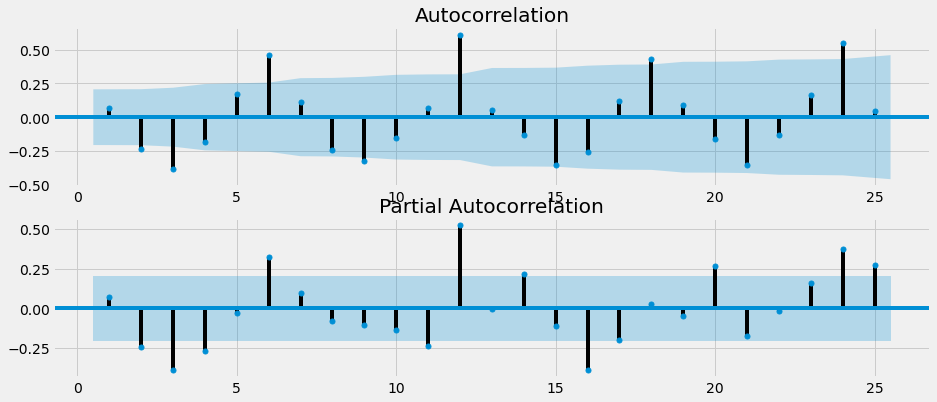

In [55]:
# figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,6))

# ACF plot
plot_acf(data["consommation_corrigee"], lags=25, zero=False, ax=ax1)

# PACF plot
plot_pacf(data["consommation_corrigee"], lags=25, zero=False, ax=ax2)

plt.show()

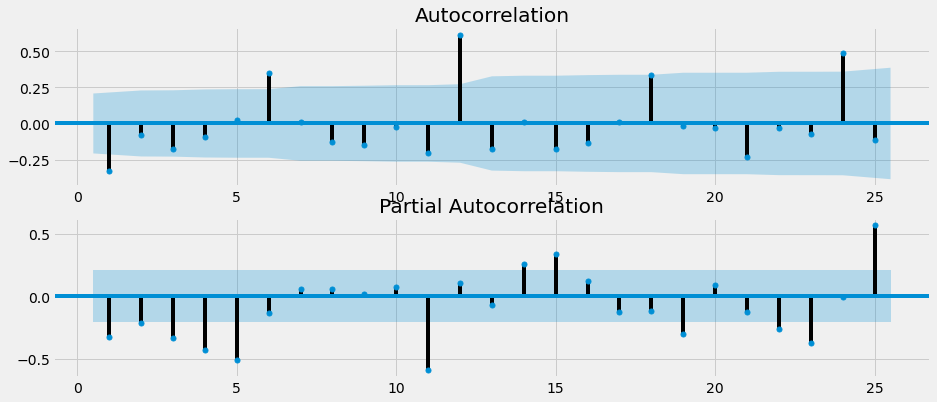

In [56]:
# figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,6))

# ACF plot
plot_acf(data["consommation_corrigee"].diff().dropna(), lags=25, zero=False, ax=ax1)

# PACF plot
plot_pacf(data["consommation_corrigee"].diff().dropna(), lags=25, zero=False, ax=ax2)

plt.show()

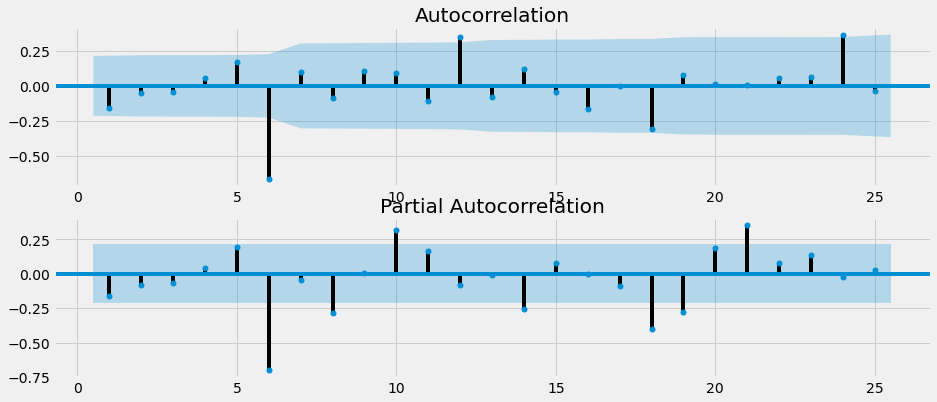

In [57]:
# figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,6))

# ACF plot
plot_acf(data["consommation_corrigee"].diff(6).dropna(), lags=25, zero=False, ax=ax1)

# PACF plot
plot_pacf(data["consommation_corrigee"].diff(6).dropna(), lags=25, zero=False, ax=ax2)

plt.show()

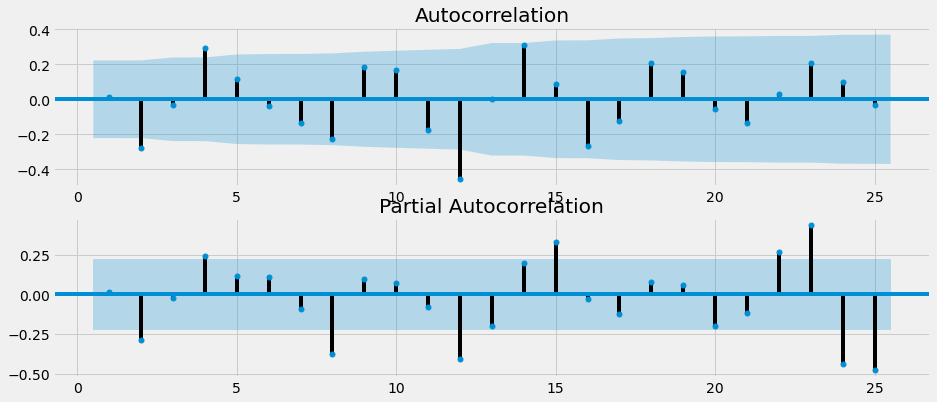

In [58]:
# figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(14,6))

# ACF plot
plot_acf(data["consommation_corrigee"].diff(12).dropna(), lags=25, zero=False, ax=ax1)

# PACF plot
plot_pacf(data["consommation_corrigee"].diff(12).dropna(), lags=25, zero=False, ax=ax2)

plt.show()

In [59]:
# test stationnarité 12 mois
results = adfuller(data["consommation_corrigee"].diff(12).dropna())
print(results)
print(results[1])

(-3.6105257146956844, 0.005562957909765694, 12, 65, {'1%': -3.5352168748293127, '5%': -2.9071540828402367, '10%': -2.5911025443786984}, 1095.978428779378)
0.005562957909765694


In [60]:
# test stationnarité 6 mois
results = adfuller(data["consommation_corrigee"].diff(6).dropna())
print(results)
print(results[1])

(-3.3065555223514207, 0.014587973432571778, 9, 74, {'1%': -3.5219803175527606, '5%': -2.9014701097664504, '10%': -2.58807215485756}, 1205.2330873115002)
0.014587973432571778


* Stationnaire 6 mois


In [61]:
from pmdarima.arima.utils import nsdiffs

nsdiffs(data["consommation_corrigee"],
        m=12,
        max_D=12,
        test='ocsb')  # -> 0

0

In [62]:
# estimate number of seasonal differences using a Canova-Hansen test
D = nsdiffs(data["consommation_corrigee"],
            m=12,  # commonly requires knowledge of dataset
            max_D=12,
            test='ch')  # -> 0
D

0

# Modélisation

## Train, Test split

In [63]:
data.shape


(90, 4)

* Train = 60 obs 
* Test = 30 obs


In [64]:
# séparation jeu entrainement
data_train = data.loc[:"2016-12-01",]
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2012-01-01 to 2016-12-01
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Consommation totale        60 non-null     int64  
 1   dju                        60 non-null     float64
 2   consommation_corrigee      60 non-null     float64
 3   consommation_stationnaire  60 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.3 KB


In [65]:
# séparation jeu test 
data_test = data.loc["2017-01-01":,]
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2017-01-01 to 2019-06-01
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Consommation totale        30 non-null     int64  
 1   dju                        30 non-null     float64
 2   consommation_corrigee      30 non-null     float64
 3   consommation_stationnaire  30 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.2 KB


Text(0.5, 1.0, "Consommation corrigée de l'effet température (MW)")

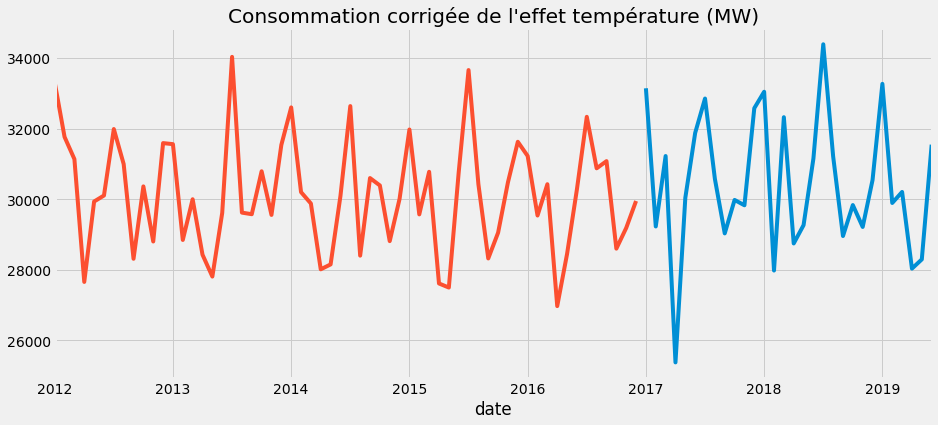

In [66]:
# graph train et test 
fig, ax = plt.subplots(1,1, figsize=(14,6))
data_test["consommation_corrigee"].plot(ax=ax)
data_train["consommation_corrigee"].plot(ax=ax)
plt.title("Consommation corrigée de l'effet température (MW)")

## Empty scores

In [67]:
model_name = []
rmse = []
mape = []

## Baseline : mean

In [68]:
mean = data_train["consommation_corrigee"].mean()

In [69]:
# création df pred et actual
df = pd.DataFrame({'Actual': data_test["consommation_corrigee"], 'Predicted': mean })
df = df.dropna()

rmse.append(np.sqrt(((df.Actual-df.Predicted)**2).mean()))
mape.append(round(np.abs(1-df.Predicted/df.Actual).mean()*100,2))
model_name.append("Baseline - mean")

## Baseline : Rolling average

In [70]:
split_time = 60

time = data.index

series = np.array(data["consommation_corrigee"])

### 6 mois

In [71]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
  If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

window_size = 6
moving_avg = moving_average_forecast(series, window_size )[split_time - window_size:]

In [72]:
# création df pred et actual
df = pd.DataFrame({'Actual': data_test["consommation_corrigee"], 'Predicted': moving_avg })
df = df.dropna()

rmse.append(np.sqrt(((df.Actual-df.Predicted)**2).mean()))
mape.append(round(np.abs(1-df.Predicted/df.Actual).mean()*100,2))
model_name.append("Baseline - Roll 6 mois")

### 12 mois

In [73]:
def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
  If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

window_size = 12
moving_avg = moving_average_forecast(series, window_size )[split_time - window_size:]

In [74]:
# création df pred et actual
df = pd.DataFrame({'Actual': data_test["consommation_corrigee"], 'Predicted': moving_avg })
df = df.dropna()

rmse.append(np.sqrt(((df.Actual-df.Predicted)**2).mean()))
mape.append(round(np.abs(1-df.Predicted/df.Actual).mean()*100,2))
model_name.append("Baseline - Roll 6 mois")

## Holt Winters


### HW 6 mois

In [75]:
# préparation modele
hw = ExponentialSmoothing(data_train["consommation_corrigee"], seasonal_periods=6, trend='add', seasonal='add').fit()
hw_pred_6 = hw.forecast(30)

# création df pred et actual
df = pd.DataFrame({'Actual': data_test["consommation_corrigee"], 'Predicted': hw_pred_6 })
df = df.dropna()

rmse.append(np.sqrt(((df.Actual-df.Predicted)**2).mean()))
mape.append(round(np.abs(1-df.Predicted/df.Actual).mean()*100,2))
model_name.append("Holt Winters - 6 mois")



#### rmse et mape


### HW 12 mois


In [76]:
hw = ExponentialSmoothing(data_train["consommation_corrigee"], seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred_12 = hw.forecast(30)

df = pd.DataFrame({'Actual': data_test["consommation_corrigee"], 'Predicted': hw_pred_12 })
df = df.dropna()

rmse.append(np.sqrt(((df.Actual-df.Predicted)**2).mean()))
mape.append(round(np.abs(1-df.Predicted/df.Actual).mean()*100,2))
model_name.append("Holt Winters - 12 mois")


## SARIMA


### Recherche sur grille paramètres model SARIMA 6 mois

* Recherche avec saisonnalité de 6 sur 1 différences

In [77]:
# recherche sur grille
stepwise_model = auto_arima(data["consommation_corrigee"], m=6,
                           D=1,seasonal=True,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,
                            information_criterion='aic')
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[6] intercept   : AIC=1482.677, Time=0.83 sec
 ARIMA(0,0,0)(0,1,0)[6] intercept   : AIC=1492.875, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[6] intercept   : AIC=1491.626, Time=0.11 sec
 ARIMA(0,0,1)(0,1,1)[6] intercept   : AIC=1491.180, Time=0.07 sec
 ARIMA(0,0,0)(0,1,0)[6]             : AIC=1490.904, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[6] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,0,2)(1,1,0)[6] intercept   : AIC=1495.125, Time=0.56 sec
 ARIMA(2,0,2)(2,1,1)[6] intercept   : AIC=1483.321, Time=1.04 sec
 ARIMA(2,0,2)(1,1,2)[6] intercept   : AIC=1475.498, Time=1.18 sec
 ARIMA(2,0,2)(0,1,2)[6] intercept   : AIC=1478.967, Time=1.00 sec
 ARIMA(2,0,2)(2,1,2)[6] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(1,0,2)(1,1,2)[6] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(2,0,1)(1,1,2)[6] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(3,0,2)(1,1,2)[6] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(2,0,3)(1,1,2)[6] intercept   : AIC=1482.983, Time=1

* SARIMA(2,0,2)x(1,1,2,6) meilleurs paramètres
* AIC = 1475


### Model 1

* SARIMA(2,0,2)x(1,1,2,6) meilleurs paramètres
* AIC = 1475


In [78]:
# Fit model
model = SARIMAX(data["consommation_corrigee"], order=(2,0,2),seasonal_order=(1,1,2,6))
model1 = model.fit()

### Forecast

In [79]:
# prediction du 30
forecast = model1.get_prediction(start = -30)

# forecast mean
mean_forecast_6 = forecast.predicted_mean

df = pd.DataFrame({'Actual': data_test["consommation_corrigee"], 'Predicted': mean_forecast_6 })
df = df.dropna()



In [80]:
rmse.append(np.sqrt(((df.Actual-df.Predicted)**2).mean()))
mape.append(round(np.abs(1-df.Predicted/df.Actual).mean()*100,2))
model_name.append("SARIMA - 6 mois")

### Recherche sur grille paramètres model SARIMA 12 mois

* Recherche avec saisonnalité de 12 sur 1 différences

In [81]:
# recherche sur grille
stepwise_model = auto_arima(data["consommation_corrigee"], m=12,
                           D=1,seasonal=True,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,
                            information_criterion='aic')
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1344.348, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1344.489, Time=0.14 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1343.658, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1342.350, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1343.253, Time=0.09 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1343.231, Time=0.11 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1343.004, Time=0.70 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1345.139, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1344.348, Time=0.17 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1340.218, Time=0.16 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1342.256, Time=0.31 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1342.245, Time=0.27 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(2,0,1)(0,1,0)[12] inte

* SARIMA(4,0,2)x(0,1,0,12) meilleurs paramètres
* AIC = 1329


In [82]:
# Fit model
model = SARIMAX(data["consommation_corrigee"], order=(4,0,2),seasonal_order=(0,1,0,12))
model2 = model.fit()


In [83]:
# prediction sur 30 
forecast = model2.get_prediction(start = -30)

# forecast mean
mean_forecast_12 = forecast.predicted_mean

df = pd.DataFrame({'Actual': data_test["consommation_corrigee"], 'Predicted': mean_forecast_12 })
df = df.dropna()



rmse.append(np.sqrt(((df.Actual-df.Predicted)**2).mean()))
mape.append(round(np.abs(1-df.Predicted/df.Actual).mean()*100,2))
model_name.append("SARIMA - 12 mois")

# NN

In [84]:
# data prep

split_time = 60

time = data.index

series = np.array(data["consommation_corrigee"])

# Standardisation
mean = series.mean(axis=0)
series-=mean
std = series.std(axis=0)
series/=std

time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

In [85]:
# helper functions

## Create dataset for keras
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(
  lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

## Predict forcast
def model_forecast(model, series, window_size):
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size))
  ds = ds.batch(32).prefetch(1)
  forecast = model.predict(ds)
  return forecast

In [86]:
# Tensorflow callbacks
early_stopping = keras.callbacks.EarlyStopping(monitor='val_mse',patience=10)
model_checkpoint = keras.callbacks.ModelCheckpoint("my_checkpoint",monitor='val_mse',save_best_only=True)
reducelr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor= "val_mse",
        mode='min',
        factor=0.1,
        patience=2,
        verbose=0
    )

callbacks=[model_checkpoint,early_stopping,reducelr]

## CNN

In [87]:
# CNN model function
def build_CNN_model(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv1D(
      filters=hp.Int('units_1',min_value=32, max_value=256, step=32),
      kernel_size = window_size,
      padding='causal', activation='relu', input_shape=[None, 1]
      )),
    model.add(tf.keras.layers.Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.2))),
    
    model.add(tf.keras.layers.Dense(1))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1,1e-2, 1e-3, 1e-4, 1e-5])

    model.compile(loss="mse",
      optimizer=tf.keras.optimizers.SGD(learning_rate=hp_learning_rate), metrics = ["mse"])
    return model

In [88]:
# Defining parameters

batch_size = 8
shuffle_buffer_size = 60

# Defining window sizes
sizes = [6,12]

In [89]:
#Looping through window sizes, creating dataset, tuning the model,
# fitting best model, make prediction, compute scores

for window_size in sizes:

  dataset = windowed_dataset(x_train, window_size,
    batch_size, shuffle_buffer_size)
  valid_dataset = windowed_dataset(x_valid, window_size,
    batch_size, shuffle_buffer_size)

  tuner_name = 'cnn-tune-' + str(window_size)

  tuner = kt.Hyperband(build_CNN_model,
                     objective='val_mse',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name=tuner_name)
  
  tuner.search(dataset, epochs=10, validation_data=valid_dataset, verbose=0)

  best_model = tuner.get_best_models(1)[0]

  best_model.fit(dataset, epochs=500, verbose=0,validation_data=valid_dataset,
                    callbacks=callbacks)
  
  forecast = model_forecast(best_model, series[..., np.newaxis], window_size)
  results = forecast[split_time - window_size:-1, -1, 0]
  testScore = math.sqrt(mean_squared_error(x_valid*std+mean, results*std+mean))

  rmse.append(testScore)
  mape.append(round(np.abs(1-(results*std+mean)/(x_valid*std+mean)).mean()*100,2))

  name = "CNN-" + str(window_size) + " mois"

  model_name.append(name)
  print("Fitted model for:",name)

INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
Fitted model for: CNN-6 mois
INFO:tensorflow:Oracle triggered exit
Fitted model for: CNN-12 mois


## RNN

In [90]:
def build_RNN_model(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.SimpleRNN(
    hp.Int('units_1',min_value=32, max_value=256, step=32),
    input_shape=[None, 1],return_sequences=True)),

  model.add(tf.keras.layers.SimpleRNN(
    hp.Int('units_2',min_value=32, max_value=256, step=32),
    input_shape=[None, 1],return_sequences=True)),

  model.add(tf.keras.layers.SimpleRNN(
    hp.Int('units_3',min_value=32, max_value=256, step=32),
    input_shape=[None, 1],return_sequences=True)),

  model.add(tf.keras.layers.SimpleRNN(
    hp.Int('units_4',min_value=32, max_value=256, step=32))),

  model.add(tf.keras.layers.Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.2))),
  
  model.add(tf.keras.layers.Dense(1))

  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1,1e-2, 1e-3, 1e-4, 1e-5])

  model.compile(loss="mse",
    optimizer=tf.keras.optimizers.SGD(learning_rate=hp_learning_rate,momentum=0.9), metrics = ["mse"])
  return model

In [91]:
#Looping through window sizes, creating dataset, tuning the model,
# fitting best model, make prediction, compute scores

for window_size in sizes:

  dataset = windowed_dataset(x_train, window_size,
    batch_size, shuffle_buffer_size)
  valid_dataset = windowed_dataset(x_valid, window_size,
    batch_size, shuffle_buffer_size)
  
  tuner_name = 'rnn-tune-' + str(window_size)

  tuner = kt.Hyperband(build_RNN_model,
                     objective='val_mse',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name=tuner_name)
  
  tuner.search(dataset, epochs=10, validation_data=valid_dataset, verbose=0)

  best_model = tuner.get_best_models(1)[0]

  best_model.fit(dataset, epochs=500, verbose=0,validation_data=valid_dataset,
                    callbacks=callbacks)
  
  forecast = model_forecast(best_model, series[..., np.newaxis], window_size)
  results = forecast[split_time - window_size:-1, -1]
  testScore = math.sqrt(mean_squared_error(x_valid*std+mean, results*std+mean))

  rmse.append(testScore)
  mape.append(round(np.abs(1-(results*std+mean)/(x_valid*std+mean)).mean()*100,2))

  name = "RNN-" + str(window_size) + " mois"

  model_name.append(name)
  print("Fitted model for:",name)

INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Assets written to: my_checkpoint/assets
Fitted model for: RNN-6 mois
INFO:tensorflow:Oracle triggered exit
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
INFO:tensorflow:Assets written to: my_checkpoint/assets
Fitted model for: RNN-12 mois


# LSTM

In [92]:
def build_LSTM_model(hp):
  model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(hp.Int('units_1',min_value=32, max_value=256, step=32), 
    input_shape=[None, 1],return_sequences=True),

    tf.keras.layers.LSTM(hp.Int('units_2',min_value=32, max_value=256, step=32), 
    input_shape=[None, 1],return_sequences=True),

    tf.keras.layers.LSTM(hp.Int('units_3',min_value=32, max_value=256, step=32), 
    input_shape=[None, 1],return_sequences=True),

    tf.keras.layers.LSTM(hp.Int('units_4',min_value=32, max_value=256, step=32), 
    input_shape=[None, 1]),

    tf.keras.layers.Dropout(hp.Float('dropout', 0, 0.5, step=0.1, default=0.2)),
    tf.keras.layers.Dense(1)
    ])
  
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1,1e-2, 1e-3, 1e-4, 1e-5])

  model.compile(loss="mse",
    optimizer=tf.keras.optimizers.SGD(learning_rate=hp_learning_rate,momentum=0.9), metrics = ["mse"])
  return model

In [93]:
#Looping through window sizes, creating dataset, tuning the model,
# fitting best model, make prediction, compute scores
for window_size in sizes:

  dataset = windowed_dataset(x_train, window_size,
    batch_size, shuffle_buffer_size)
  valid_dataset = windowed_dataset(x_valid, window_size,
    batch_size, shuffle_buffer_size)
  
  tuner_name = 'lstm-tune-' + str(window_size)

  tuner = kt.Hyperband(build_LSTM_model,
                     objective='val_mse',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name=tuner_name)
  
  tuner.search(dataset, epochs=10, validation_data=valid_dataset, verbose=0)

  best_model = tuner.get_best_models(1)[0]

  best_model.fit(dataset, epochs=500, verbose=0,validation_data=valid_dataset,
                    callbacks=callbacks)
  
  forecast = model_forecast(best_model, series[..., np.newaxis], window_size)
  results = forecast[split_time - window_size:-1, -1]
  testScore = math.sqrt(mean_squared_error(x_valid*std+mean, results*std+mean))

  rmse.append(testScore)
  mape.append(round(np.abs(1-(results*std+mean)/(x_valid*std+mean)).mean()*100,2))

  name = "LSTM-" + str(window_size) + " mois"

  model_name.append(name)
  print("Fitted model for:",name)

INFO:tensorflow:Oracle triggered exit
Fitted model for: LSTM-6 mois
INFO:tensorflow:Oracle triggered exit
Fitted model for: LSTM-12 mois


# Performances

In [94]:
temp = { "Model" : model_name,
        "RMSE" : rmse,
        "MAPE" : mape
        
    
}
print("Number of tested models:",len(model_name))

Number of tested models: 13


In [95]:
scores = pd.DataFrame(temp)

scores.sort_values("RMSE", ascending=True, inplace=True)
scores.reset_index(inplace=True, drop = True)
scores = scores.iloc[:5,:]
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s = scores.style.background_gradient(cmap=cm)
s

,Model,RMSE,MAPE
0,Holt Winters - 6 mois,1212.278831,3.300000
1,SARIMA - 12 mois,1250.320847,3.460000
2,Holt Winters - 12 mois,1267.683594,3.620000
3,SARIMA - 6 mois,1393.071491,3.840000
4,CNN-6 mois,1613.287418,4.460000


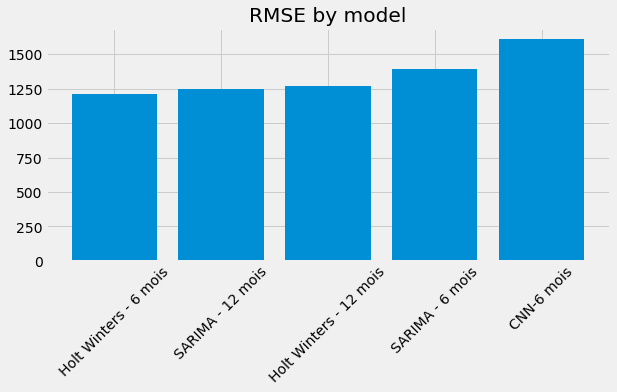

In [96]:
# ploting rmse score
plt.figure(figsize=(9,4))
plt.bar(scores["Model"],scores["RMSE"])
plt.title("RMSE by model")
plt.xticks(rotation=45)
plt.show()

# Evaluation des modèles

## Holt winters 6 mois

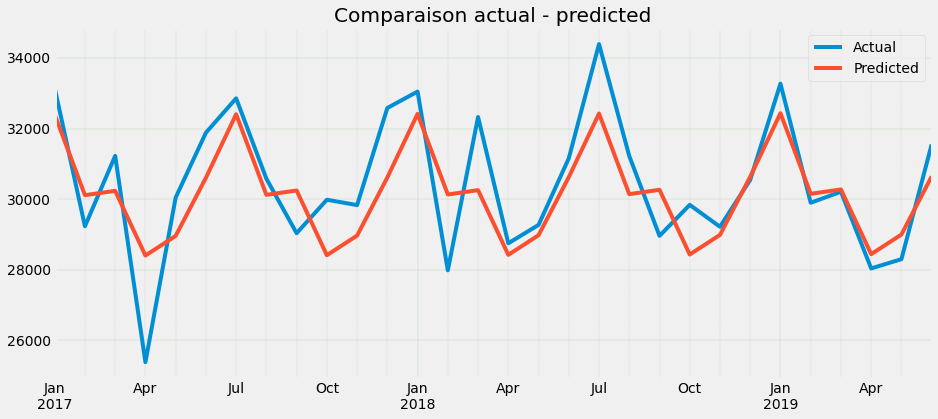

In [97]:
df = pd.DataFrame({'Actual': data_test["consommation_corrigee"], 'Predicted': hw_pred_6 })
df = df.dropna()

df1 = df
df1.plot(figsize=(14,6))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.title("Comparaison actual - predicted")
plt.show()

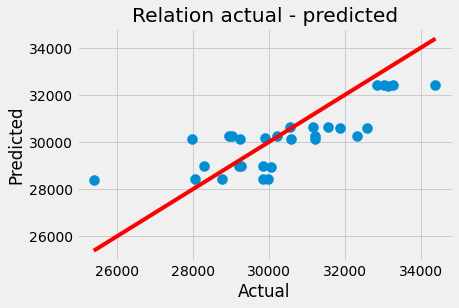

In [98]:
# comparaison graphique
df1.plot(kind='scatter',x = "Actual", y = "Predicted", s=100)
ident = [min(df1.Actual),max(df1.Actual)]
plt.plot(ident,ident, color = "r")
plt.title("Relation actual - predicted")
plt.show()

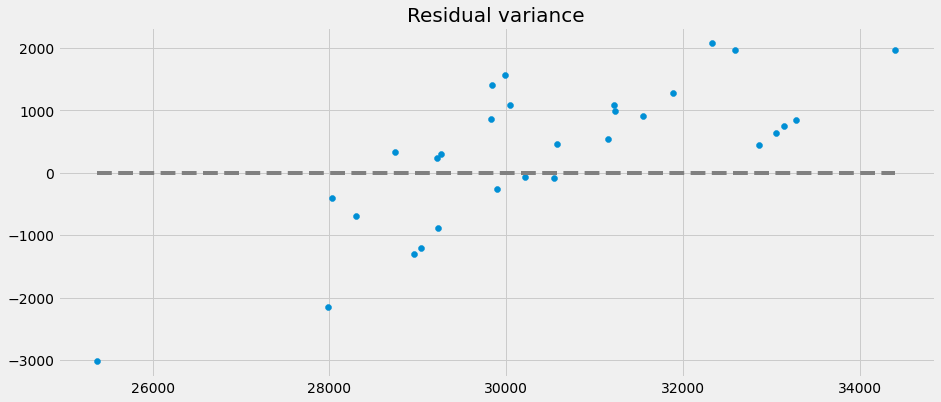

In [99]:
#Residual variance

fig = plt.figure(figsize=(14,6))

plt.scatter(df1.Actual,df1.Actual-df1.Predicted)
plt.title('Residual variance', size=20)
plt.hlines(0,min(df1.Actual),max(df1.Actual), color="gray", linestyles="--")
plt.show()

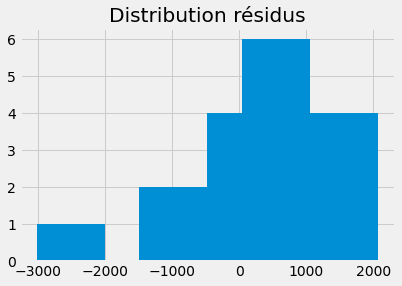

In [100]:
plt.hist(df1.Actual-df1.Predicted)
plt.title('Distribution résidus')
plt.show()

In [101]:
shapiro_test = shapiro(df1.Actual-df1.Predicted)

print("pvalue Shapiro")
shapiro_test[1]

pvalue Shapiro


0.09444665163755417

## SARIMA 12 mois

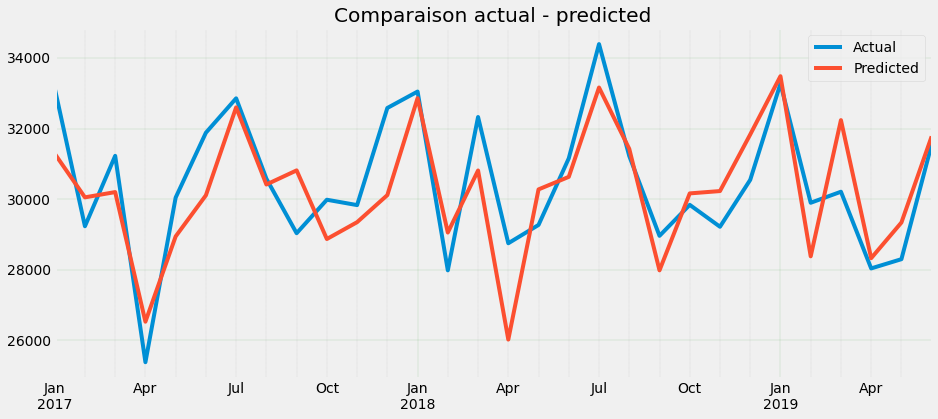

In [102]:
# forecast mean

df = pd.DataFrame({'Actual': data_test["consommation_corrigee"], 'Predicted': mean_forecast_12 })
df = df.dropna()

df1 = df
df1.plot(figsize=(14,6))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.title("Comparaison actual - predicted")
plt.show()

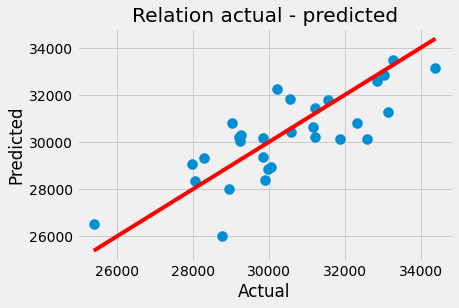

In [103]:
# comparaison graphique
df1.plot(kind='scatter',x = "Actual", y = "Predicted", s=100)
ident = [min(df1.Actual),max(df1.Actual)]
plt.plot(ident,ident, color = "r")
plt.title("Relation actual - predicted")
plt.show()

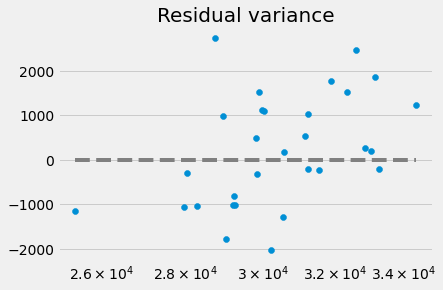

In [104]:
plt.scatter(df1.Actual,df1.Actual-df1.Predicted)
plt.title('Residual variance', size=20)
plt.hlines(0,min(df1.Actual),max(df1.Actual), color="gray", linestyles="--")
plt.xscale('log')
plt.show()

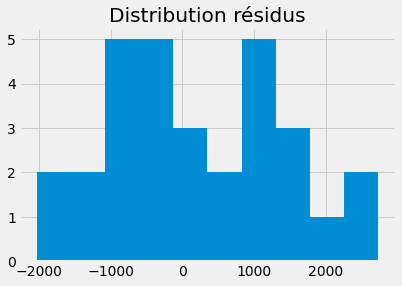

In [105]:
plt.hist(df1.Actual-df1.Predicted)
plt.title('Distribution résidus')
plt.show()

In [106]:
shapiro_test = shapiro(df1.Actual-df1.Predicted)

print("pvalue Shapiro")
shapiro_test[1]

pvalue Shapiro


0.6395911574363708

## RNN 6 mois

In [107]:
window_size = 6 

dataset = windowed_dataset(x_train, window_size,
  batch_size, shuffle_buffer_size)
valid_dataset = windowed_dataset(x_valid, window_size,
  batch_size, shuffle_buffer_size)

tuner_name = 'rnn-tune-' + str(window_size)

tuner = kt.Hyperband(build_RNN_model,
                    objective='val_mse',
                    max_epochs=10,
                    factor=3,
                    directory='my_dir',
                    project_name=tuner_name)

tuner.search(dataset, epochs=10, validation_data=valid_dataset, verbose=0)

best_model = tuner.get_best_models(1)[0]

best_model.fit(dataset, epochs=500, verbose=0,validation_data=valid_dataset,
                  callbacks=callbacks)

forecast = model_forecast(best_model, series[..., np.newaxis], window_size)
results = forecast[split_time - window_size:-1, -1]

INFO:tensorflow:Reloading Oracle from existing project my_dir/rnn-tune-6/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/rnn-tune-6/tuner0.json
INFO:tensorflow:Oracle triggered exit


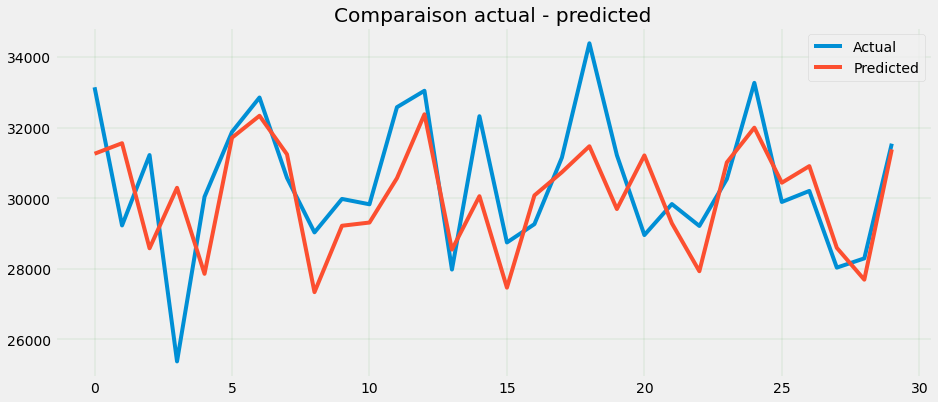

In [108]:
# forecast mean

df = pd.DataFrame({'Actual': x_valid*std+mean, 'Predicted': results*std+mean })
df = df.dropna()

df1 = df
df1.plot(figsize=(14,6))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.title("Comparaison actual - predicted")
plt.show()

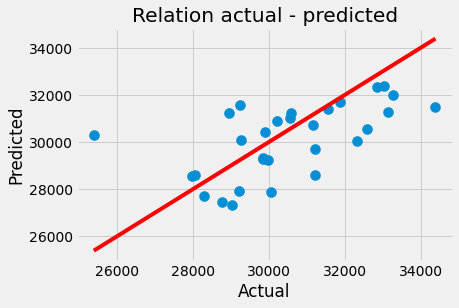

In [109]:
# comparaison graphique
df1.plot(kind='scatter',x = "Actual", y = "Predicted", s=100)
ident = [min(df1.Actual),max(df1.Actual)]
plt.plot(ident,ident, color = "r")
plt.title("Relation actual - predicted")
plt.show()

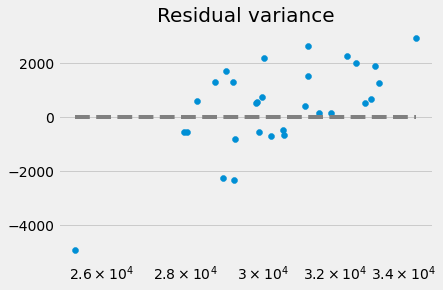

In [110]:
plt.scatter(df1.Actual,df1.Actual-df1.Predicted)
plt.title('Residual variance', size=20)
plt.hlines(0,min(df1.Actual),max(df1.Actual), color="gray", linestyles="--")
plt.xscale('log')
plt.show()

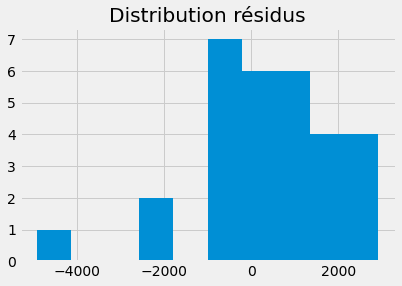

In [111]:
plt.hist(df1.Actual-df1.Predicted)
plt.title('Distribution résidus')
plt.show()

In [112]:
shapiro_test = shapiro(df1.Actual-df1.Predicted)

print("pvalue Shapiro")
shapiro_test[1]

pvalue Shapiro


0.031465183943510056

# Prédiction

In [113]:
hw = ExponentialSmoothing(data["consommation_corrigee"], seasonal_periods=6, trend='add', seasonal='add').fit()
hw_pred = hw.forecast(12)

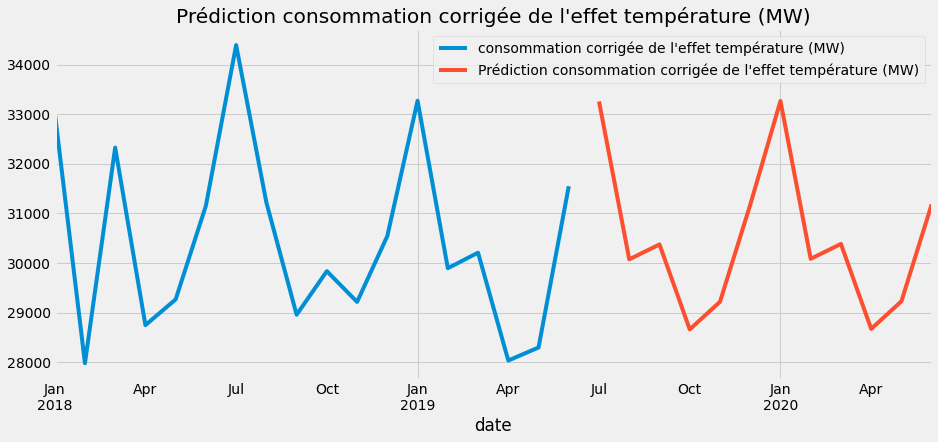

In [115]:
# graph train et test 
fig, ax = plt.subplots(1,1, figsize=(14,6))
data.loc["2018":]["consommation_corrigee"].plot(ax=ax, label = "consommation corrigée de l'effet température (MW)")
hw_pred.plot(ax=ax, label = "Prédiction consommation corrigée de l'effet température (MW)")
plt.title("Prédiction consommation corrigée de l'effet température (MW)")
plt.legend()
plt.show()

In [116]:
data.to_csv("data_rte_clean.csv")